# Twitter Sentiment Analysis

### 1. Import Libraries

Import all the libraries to be used in this notebook. We load the initial libraries at the beginning and keep on adding more libraries as we go along on the project

In [ ]:
# Import Libraries

import tweepy # for tweet mining
from textblob import TextBlob # TextBlob - Python library for processing textual data
from wordcloud import WordCloud # WordCloud - Python library for creating image wordclouds
from nltk.sentiment.vader import SentimentIntensityAnalyzer #  lexicon and rule-based sentiment analysis tool
import pandas as pd # for data manipulation and analysis
import numpy as np # for working with arrays and carrying out mathematical operations.
import re # In-built regular expressions library
import os # to access environment from the operating system 
import string # Inbuilt string library
import glob # to retrieve files/pathnames matching a specified pattern. 
import matplotlib.pyplot as plt  # for plotting
import alpaca_trade_api as tradeapi
from datetime import datetime, timedelta
import hvplot.pandas
plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
from dotenv import load_dotenv  # loading the  environment 

In [ ]:
# Loading Environment from the operating system
load_dotenv()

In [ ]:
# Natural Language Processing Toolkit
import nltk
import spacy
import emoji
import stop_words
# Tokenize - large quantity of text is divided into smaller parts 
from nltk.tokenize import sent_tokenize, word_tokenize 
from nltk import pos_tag # For Parts of Speech tagging
from collections import Counter # count the key-value pairs
from spacy import displacy # dependency visualizer that show model's predictions
nlp = spacy.load("en_core_web_sm") # English pipeline optimization
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('averaged_perceptron_tagger')

In [ ]:
# ML Toolkit 

# (Ensembled Learning)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import normalize
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.cluster import KMeans


from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import EasyEnsembleClassifier
import pydotplus
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier


# (Linear Regression)
from sklearn import metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

# (Tensor Flow)
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop

### 2. Tweets Mining

We are using the Tweepy library for Python to scrape tweets. We created a developer account with Twitter to get the keys used below for this task.

In [ ]:
# Get the API keys from env

consumer_key = "PHyNGsjBkAbUBTaW3EJV1jepw"
consumer_secret_key = "RhAPZH5uTvcuodAQXWgsaCtnWV5gBIwbGuFNgB8asBdumUHBdY"
access_token = "1023433478-n23JcqhTsmasEXAuFtJVU3casHoRjemeGR5c2A7"
access_token_secret = "iXJ0XIB29VdNbObYmkNm1iWCZtfNaSnPFiRaNtBuiGM17"

# Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret_key)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

In [ ]:
# checking the API keys validate or not

In [ ]:
type(consumer_key)

In [ ]:
type(consumer_secret_key)

In [ ]:
type(access_token)

In [ ]:
type(access_token_secret)

#### User-defined Functions for Tweets Mining

We created a functions for searching with different phrases, Example "EV Stock", "Best EV Stock", "EV Stock Future", "Top EV Maker". We do  different searches and each result store in a csv file. This is because we can be consistant with the data as we work along. 

In [13]:
def write_df_to_csv(df, file_name):
    df.to_csv(file_name, index=False)

In [14]:
def getTweets():
    keyword = input("Please enter keyword or hashtag to search: ")
    noOfTweet = int(input ("Number of tweets to analyze: "))
    tweet_list = []
    # Collect tweets using the Cursor object
    tweets = tweepy.Cursor(api.search, 
                           q=keyword, 
                           keyword = keyword + "  -filter:links AND -filter:retweets AND -filter:replies", 
                          lang="en",
                          tweet_mode='extended' ).items(noOfTweet)
     # Each item in the iterator has various attributes that you can access to get information about each tweet
    for tweet in tweets:
        tweet_list.append([
            tweet.id,
            tweet.created_at,
            tweet.full_text,
            tweet.user.location,
            tweet.retweet_count,
            tweet.favorite_count
        ])
    return tweet_list

In [15]:
# tweet_list = getTweets()

In [16]:
# tweet_list_df = pd.DataFrame(tweet_list,columns=["Id","Date", "Tweets","Location","Retweets","Favorite"])
# tweet_list_df.head()

In [17]:
# tweet_list_df.shape

In [18]:
### USE DIFFERENT FILE NAME TO SAVE EACH SEARCH. OR else it will replace the previous data
# write_df_to_csv(tweet_list_df,"EV_best_2_tweet.csv")

In [19]:
## read_csv with new search data to check. We do not need these lines .. 
## it is just to check if how may tweets we are getting. 

In [20]:
# stock_tweet = pd.read_csv("EV_Stock_tweet.csv")

In [21]:
#stock_tweet.shape

In [22]:
#pwd

#### Combining all Tweets into single Pandas Dataframe

In [23]:
## commenting these lines as we got the tweets and save it to a csv

In [24]:
#path = "/Users/syedahasan/Desktop/EV_Sentiment_Trading"
##all_files = glob.glob(path + "/*.csv")
#all_files

In [25]:
#tweets = []

#for filename in all_files:
#    df = pd.read_csv(filename,  index_col=None, parse_dates=True,  header=0) # Convert each csv to a dataframe
#    tweets.append(df)

#tweets_df = pd.concat(tweets, axis=0, ignore_index=True) # Merge all dataframes
#tweets_df['Date']= pd.to_datetime(tweets_df['Date'])
#tweets_df.head()

In [26]:
# Write all tweets in one csv
# write_df_to_csv(tweets_df,"EV_ALL_TWEETS.csv")

In [27]:
tweets_df = pd.read_csv("EV_ALL_TWEETS.csv",  index_col=None, parse_dates=True,  header=0) 

In [28]:
tweets_df['Date']= pd.to_datetime(tweets_df['Date']).dt.normalize() # changing date time to date
tweets_df.head()

,Id,Date,Tweets,Location,Retweets,Favorite
0,1420544025631760384,2021-07-29,@ev_truths @alex_avoigt I think EV technology ...,"Seattle, WA",0,0
1,1420519469865177088,2021-07-28,Compact International(1994) Wants to be Top EV...,U.S.A,0,0
2,1419726996104486919,2021-07-26,RT @cliffski: Toyota are not much better than ...,"Louisville, KY",2,0
3,1419703662092472320,2021-07-26,Toyota are not much better than volkswagen. Th...,None of your business,2,4
4,1419665554038681606,2021-07-26,GM China’s Venture Has Big Ambitions Beyond $4...,Vancouver and London,0,0


In [29]:
tweets_df.dtypes

Id                   int64
Date        datetime64[ns]
Tweets              object
Location            object
Retweets             int64
Favorite             int64
dtype: object

### 3. Data Cleaning

The dataframe that is created on above, will be cleaned in this section. We are going to search for any duplication and will remove it. It is also important to mention that the Tweet ID was considered as the Primary key for all the dataframe. We are also going to replace the "NaN" values in Location column.

In [30]:
#Get number of rows and columns
tweets_df.shape 

(12676, 6)

In [31]:
tweets_df.duplicated(subset='Tweets').sum() # Check for duplicate values

4786

In [32]:
# drop duplicate values
tweets_df=tweets_df.drop_duplicates(subset='Tweets',keep="last") 

In [33]:
# Check the shape after dropping duplicates
tweets_df.shape 

(7890, 6)

In [34]:
# Check for "NaN" values
tweets_df.isna().any() 

Id          False
Date        False
Tweets      False
Location     True
Retweets    False
Favorite    False
dtype: bool

In [35]:
# Replace "NaN" values with "No Location"
tweets_df['Location']=tweets_df['Location'].fillna('No location') 

In [36]:
# Check for "NaN" values again
tweets_df.isna().any() 

Id          False
Date        False
Tweets      False
Location    False
Retweets    False
Favorite    False
dtype: bool

### 4. Processing

The Individual Tweer needed to be cleaned. We are using several functions to clean the tweet and to show the words used. We are extracting only the adjectives to a new column to view the weight.

In [37]:
# NLTK list of stopwords
from nltk.corpus import stopwords

In [38]:
# Lemmatization is a technique that transforms various morphologies of a word into its base form. 
from nltk.stem import WordNetLemmatizer 
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [39]:
def clean_tweet(text):
    text = text.lower()  #has to be in place
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # Remove @mentions
    text = re.sub(r'#', '', text)  # Remove # symbol
    text = re.sub(r'$', '', text)  # Remove $ symbol
    text = re.sub(r'RT[\s]+','', text) # Remove RT
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove urls
    text = re.sub(r'https?:\/\/\S+', '', text) # Remove hyperlink
    text = re.sub(r':','', text)
   
    sw = set(stopwords.words('english'))
    sw_addons = {'do', 'of', '$','r', '*,*','-',', ','``','\'s','.','-','public','rt',
                 'company', 'instead','&','’', 'in', 'car','they','\'your', 'what', 'also', 'seeing','agreement',
                 'time','today','ktown','pc','wts','105k','55k','ed','seeing','takeover','brokerages','rap','meet',
                 'vehicle','market','year','news','price','med','lpo','make',
                 'bakersfieldcart','takeaway','late','catching','lates','ranges'}
    words = word_tokenize(text)
    output = [x.lower() for x in words if x.lower() not in sw.union(sw_addons)]
    # Remove punctuations
    unpunctuated_words = [char for char in output if char not in string.punctuation]
    unpunctuated_words = ' '.join(unpunctuated_words)
    
    #return output
    
    return "".join(unpunctuated_words)  # join words with a space in between them

In [40]:
def give_emoji_free_text(text): 
    return emoji.get_emoji_regexp().sub(r'', text)


In [41]:
def sanitize(string):
    """ Sanitize one string """
    emoticon_string = r"""
        (?:
          [<>]?
          [:;=8]                     # eyes
          [\-o\*\']?                 # optional nose
          [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth      
          |
          [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
          [\-o\*\']?                 # optional nose
          [:;=8]                     # eyes
          [<>]?
        )"""
    stopwords = [w.lower() for w in stop_words.get_stop_words('en')]
    # remove graphical emoji
    string = give_emoji_free_text(string) 

    # remove textual emoji
    string = re.sub(emoticon_string,'',string)

    # normalize to lowercase 
    string = string.lower()

    # spacy tokenizer 
    string_split = [token.text for token in nlp(string)]

    # in case the string is empty 
    if not string_split:
        return '' 

    # join back to string 
    string = ' '.join(string_split)

    # remove user 
    # assuming user has @ in front
    string = re.sub(r"""(?:@[\w_]+)""",'',string)

    #remove # and @
    for punc in '":!@#':
        string = string.replace(punc, '')

    # remove 't.co/' links
    string = re.sub(r'http//t.co\/[^\s]+', '', string, flags=re.MULTILINE)

    # removing stop words 
    string = ' '.join([w for w in string.split() if w not in stopwords])
    string = re.sub(r"http\S+", "", string)
    return string

In [42]:
#print(tweets_df['Tweets'])

In [43]:
#print(sanitize(tweets_df['Tweets'][12671]))

In [44]:
tweets_df['Tweets'] = tweets_df['Tweets'].apply(sanitize)

In [45]:
 # remove one and two character words
tweets_df['Tweets'] = tweets_df['Tweets'].apply(lambda x: re.sub(r'\b\w{1,3}\b', '', x))
# remove punctuation
tweets_df['Tweets'] = tweets_df['Tweets'].apply(lambda x: re.sub('[^\w\s]', ' ', x))
# remove numerical values
tweets_df['Tweets'] = tweets_df['Tweets'].apply(lambda x: re.sub(r'[0-9]+', '', x))
# \s+ means all empty space (\n, \r, \t)
tweets_df['Tweets'] = tweets_df['Tweets'].apply(lambda x: re.sub('\s+', ' ', x))
    

In [46]:
#tweets_df['Tweets']

In [47]:
tweets_df['Processed_Tweets'] = tweets_df['Tweets'].apply(clean_tweet)

In [48]:
#print(tweets_df['Processed_Tweets'][12671])

In [49]:
#tweets_df['Processed_Tweets']

In [50]:
# Helper functions
def all_noun(tweet):
    """
    This function retrieves all the nouns on the given text.
    
    Args:
        text (string): The text to analyze.
        
    Returns:
        nouns (list): A list with all the nouns in the text.
    """
   
    tweet = word_tokenize(tweet)  # convert string to tokens
    tweet = [word for (word, tag) in pos_tag(tweet)
             if tag == "NN"]  # pos_tag module in NLTK library
    return " ".join(tweet)  # join words with a space in between them

In [51]:
# Helper functions
def all_adjectives(tweet):
    """
    This function retrieves all the adjectives on the given text.
    
    Args:
        text (string): The text to analyze.
        
    Returns:
        adjs (list): A list with all the adjectives in the text.
    """
   
    tweet = word_tokenize(tweet)  # convert string to tokens
    tweet = [word for (word, tag) in pos_tag(tweet)
             if tag == "JJ"]  # pos_tag module in NLTK library
    return " ".join(tweet)  # join words with a space in between them

In [52]:
# Apply all_noun function to the new 'Processed Tweets' column to generate a new column called 'Tweets_Nouns'
tweets_df['Tweets_Nouns'] = tweets_df['Processed_Tweets'].apply(all_noun)

In [53]:
tweets_df['Tweets_Adjectives'] = tweets_df['Processed_Tweets'].apply(all_adjectives)

In [54]:
def get_word_counts(t, w):
    """
    This function counts the occurrences of a word in a text.
    
    Args:
        text (string): The text where word counts will be analyzed.
        word (string): The word to look into the text.
        
    Returns:
        word_count (int): The counts of the word in the given text.
    """
    
    # Use the word_tokenize module from NLTK to tokenize the text
    tok = word_tokenize(t)
    
    # Create a list with all the tokens retrieved from the text
    tok = [w.lower() for w in tok]
    
    # Count the occurrences of the word in the text
    word_count = tok.count(w)
    
    return word_count

In [55]:
# function to return words to their base form using Lemmatizer
# ref: https://jess-analytics.medium.com/
def preprocessTweetsSentiments(tweet):
    
    tweet_tokens = word_tokenize(tweet)
    lemmatizer = WordNetLemmatizer() # instatiate an object WordNetLemmatizer Class
    lemma_words = [lemmatizer.lemmatize(w) for w in tweet_tokens]
    return " ".join(lemma_words)

In [56]:
# Apply preprocessTweetsSentiments function to the 'Processed Tweets' column to generate a new column
tweets_df['Tweets_Lemmatize'] = tweets_df['Processed_Tweets'].apply(preprocessTweetsSentiments)

In [57]:
# Extract all tweets into one long string with each word separate with a "space"
tweets_long_string = tweets_df['Tweets_Adjectives'].tolist()
tweets_long_string = " ".join(tweets_long_string)

In [58]:
from PIL import Image # for opening, manipulating, and saving many different image file 
# Import Twitter Logo
image = np.array(Image.open('twitter.png'))

In [59]:
# Create function to generate the blue colour for the Word CLoud
def blue_color_func(word, font_size, position, orientation, random_state=None,**kwargs):
    return "hsl(210, 100%%, %d%%)" % random.randint(50, 70)

<Figure size 1008x1296 with 0 Axes>

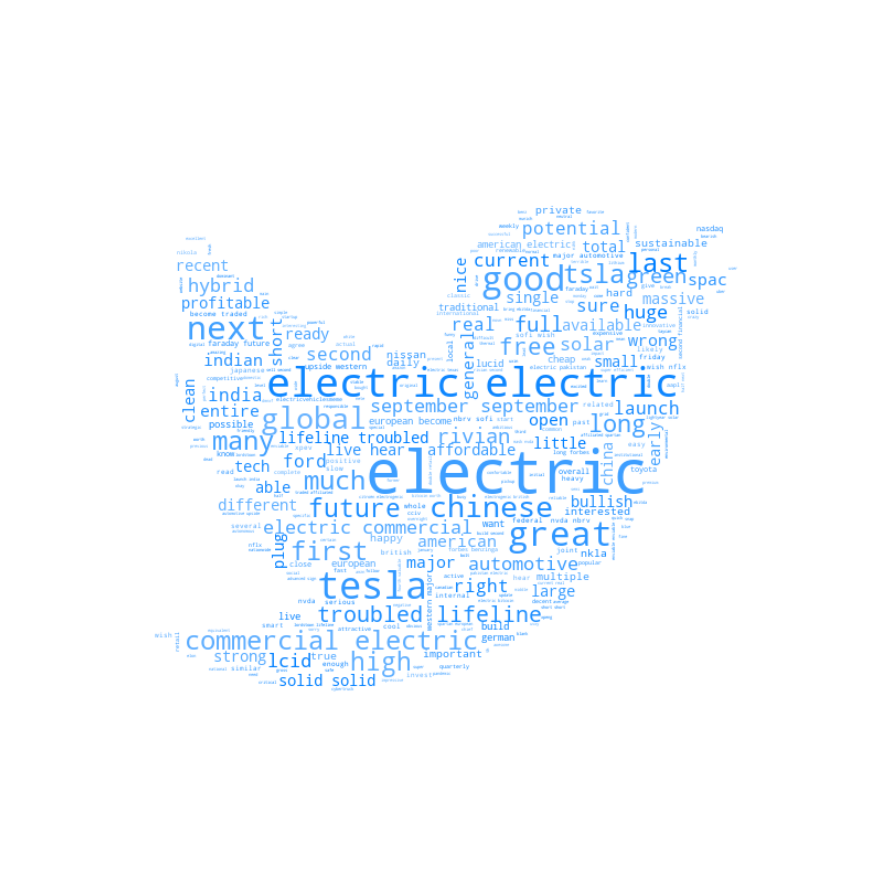

In [60]:
import random # generating random numbers
# Instantiate the Twitter word cloud object
# ref: https://amueller.github.io/word_cloud/auto_examples/masked.html
twitter_wc = WordCloud(background_color='white', max_words=1500, mask=image)

# generate the word cloud
twitter_wc.generate(tweets_long_string)
fig = plt.figure() # Instantiate the figure object
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14)  # set width
fig.set_figheight(18)  # set height

plt.imshow(twitter_wc.recolor(color_func=blue_color_func, random_state=3),
           interpolation="bilinear")
plt.axis('off')
plt.show()

In [61]:
# Combine all words into a list
tweets_long_string = tweets_df['Tweets_Adjectives'].tolist()
tweets_list=[]
for item in tweets_long_string:
    item = item.split()
    for i in item:
        tweets_list.append(i)

In [62]:
# Use the Built-in Python Collections module to determine Word frequency
counts = Counter(tweets_list)
df = pd.DataFrame.from_dict(counts, orient='index').reset_index()
df.columns = ['Words', 'Count']
df.sort_values(by='Count', ascending=False, inplace=True)
df.head(5)

,Words,Count
5,electric,1580
12,tesla,236
75,next,206
30,good,206
26,great,192


### 5. Sentiment Analysis

In this section, the aim was to undertand the sentiment of the Twitter Users while describe Electric Vehicle. 

In [63]:
nltk.download('vader_lexicon')

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/SamsonBui/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [64]:
# Sentiment calculation based on compound score
def get_sentiment(score):
    """
    Calculates the sentiment based on the compound score.
    """
    result = 0  # Neutral by default
    if score >= 0.05:  # Positive
        result = 1
    elif score <= -0.05:  # Negative
        result = -1

    return int(1) if (result == 1) else int(0) if result == 0 else int(-1)

In [65]:
# Sentiment scores dictionaries
tweet_sent = {
    "tweet": [],
    "compound": [],
    "positive": [],
    "neutral": [],
    "negative": [],
    "sentiment": [],
}

# Get sentiment for the tweet
# iterrows() method is used to iterate across the dataframe 
for index, row in tweets_df.iterrows():
    try:
        # Sentiment scoring 
        tweet_sentiment = analyzer.polarity_scores(row["Processed_Tweets"])  # VADER sentiment scores are retrieved for tweets
        tweet_sent["tweet"].append(row["Processed_Tweets"])
        tweet_sent["compound"].append(tweet_sentiment["compound"])
        tweet_sent["positive"].append(tweet_sentiment["pos"])
        tweet_sent["neutral"].append(tweet_sentiment["neu"])
        tweet_sent["negative"].append(tweet_sentiment["neg"])
        tweet_sent["sentiment"].append(get_sentiment(tweet_sentiment["compound"]))
        
    except AttributeError:
        pass

# Attaching sentiment columns to the News DataFrame

tweet_sentiment_df = pd.DataFrame(tweet_sent)
tweet_sentiment_df2 = tweets_df["Processed_Tweets"].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [66]:
tweet_sentiment_df2 = tweet_sentiment_df2.reset_index()

In [67]:
del tweet_sentiment_df2["index"]

In [68]:
tweet_date_df = tweets_df[["Date"]]

In [69]:
tweet_date_df.columns = ["date"]

In [70]:
tweet_date_df = tweet_date_df.reset_index()

In [71]:
tweet_date_df.shape

(7890, 2)

In [72]:
del tweet_date_df["index"]

In [73]:
tweet_sentiment_df2 = tweet_sentiment_df2.rename(columns={"0":"polarity","1":"subjectivity"})

In [74]:
tweet_sentiment_df2.columns = ["polarity","subjectivity"]

In [75]:
tweet_sentiment_df2.shape

(7890, 2)

In [76]:
tweet_sentiment_final = pd.concat([tweet_sentiment_df, tweet_sentiment_df2,tweet_date_df],axis=1,join="inner")

In [77]:
tweet_sentiment_final

,tweet,compound,positive,neutral,negative,sentiment,polarity,subjectivity,date
0,think technology still pretty room improve bes...,0.9118,0.612,0.388,0.000,1,0.516667,0.600000,2021-07-29
1,compact international wants brake maker,0.0000,0.000,1.000,0.000,0,0.100000,0.050000,2021-07-28
2,toyota much better volkswagen legacy companies...,0.8442,0.565,0.435,0.000,1,0.750000,0.400000,2021-07-26
3,toyota much better volkswagen legacy companies...,0.8442,0.476,0.524,0.000,1,0.571429,0.433333,2021-07-26
4,china venture ambitions beyond electric bloomberg,0.0000,0.000,1.000,0.000,0,0.000000,0.000000,2021-07-26
...,...,...,...,...,...,...,...,...,...
7885,dsgt wait good sign motorsport electricvehicle...,0.4404,0.195,0.805,0.000,1,0.350000,0.362500,2021-07-22
7886,xpdi merger highlights self mined larger hosti...,-0.2263,0.116,0.730,0.155,-1,0.000000,0.375000,2021-07-22
7887,tsla worksport charge automakers toward future,0.0000,0.000,1.000,0.000,0,0.000000,0.125000,2021-07-21
7888,tsla getting started groundwork laid future gr...,0.6249,0.212,0.788,0.000,1,0.000000,0.183333,2021-07-21


In [78]:
## ref : https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d
def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=["Total","Percentage"])
#Count_values for sentiment
count_values_in_column(tweet_sentiment_final,"sentiment")

,Total,Percentage
1,3930,49.81
0,2876,36.45
-1,1084,13.74


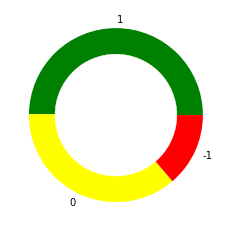

In [79]:
# create data for Pie Chart
pichart = count_values_in_column(tweet_sentiment_df,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color="white")
plt.pie(size, labels=names, colors=["green","yellow","red"])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [80]:
# Getting the TF-IDF
# A TfidfVectorizer() instance is created by passing the stopwords in English as a parameter.
vectorizer = TfidfVectorizer(stop_words="english")
X_tweets = vectorizer.fit_transform(tweets_df['Tweets_Lemmatize'])

In [81]:
# Getting matrix info
print(f"Matrix shape: {X_tweets.shape}")
print(f"Total number of tweets: {X_tweets.shape[0]}")
print(f"Total number of unique words (tokens): {X_tweets.shape[1]}")

Matrix shape: (7890, 10283)
Total number of tweets: 7890
Total number of unique words (tokens): 10283


In [82]:
# Retrieve words list from tweets
words_tweets = vectorizer.get_feature_names()
#print(words_tweets)

In [83]:
# Getting the TF-IDF weight of each word in corpus as DataFrame
# The mean value of the TF–IDF for each term is used to create the DataFrame.
words_tweets_df = pd.DataFrame(
    list(zip(words_tweets, np.ravel(X_tweets.mean(axis=0)))), columns=["Word", "TF-IDF"]
)

words_tweets_df = words_tweets_df.sort_values(by=["TF-IDF"], ascending=False)

In [84]:
words_tweets_df = words_tweets_df[:7890]
words_tweets_df = words_tweets_df.reset_index()

In [85]:
words_tweets_df.columns

Index(['index', 'Word', 'TF-IDF'], dtype='object')

In [86]:
words_tweets_df.columns = ["ID", "Word", "TFIDF"]

In [87]:
words_tweets_df = words_tweets_df.drop(columns=["ID"])

In [88]:
words_tweets_df.head()

,Word,TFIDF
0,stock,0.028767
1,electric,0.028567
2,tesla,0.021217
3,battery,0.013236
4,sale,0.012429


In [89]:
#Function to ngram
def get_top_n_gram(tweets,ngram_range,n=None):
    countVectorizer = CountVectorizer(ngram_range=ngram_range,stop_words = "english").fit(tweets)
    bag_of_words = countVectorizer.transform(tweets)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in countVectorizer.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
#n2_bigram
n2_bigrams = get_top_n_gram(tweets_df["Processed_Tweets"],(2,2),20)
ndf = pd.DataFrame(n2_bigrams, columns=["Bigrams","Count"]).set_index('Bigrams')

<AxesSubplot:ylabel='Bigrams'>

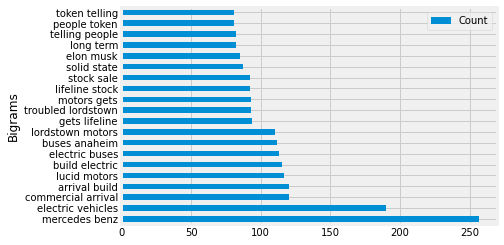

In [90]:
ndf.plot(kind='barh')

In [91]:
tweet_string = ''
for x in tweets_df["Processed_Tweets"]:
    tweet_string += ' ' + x

In [ ]:
doc = nlp(tweet_string)

# Render NER visualization with displacy to determine entities for extraction
displacy.render(doc, style='ent')

In [ ]:
# Extract geopolitical and organizational entities
entities = [x.text for x in doc.ents if x.label_ in ['GPE', 'ORG']]

In [ ]:
# lower and join each entity for word cloud creation
entities = [i.lower().replace(' ', '_') for i in entities]

In [ ]:
# Generate wordcloud
wc = WordCloud().generate(' '.join(entities))
plt.axis('off')
plt.imshow(wc)

In [ ]:
# The Tone Analyzer response is given in JSON format, 
# so the json_normalize function is imported from Pandas to transform the JSON response to a DataFrame.
from pandas import json_normalize

# ToneAnalyzerV3 is the main library to access to the Tone Analyzer via Python.
from ibm_watson import ToneAnalyzerV3

# IAMAuthenticator is used to authenticate your Python application to access the IBM cloud services.
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

import json

In [ ]:
# Get the Tone Analyzer API Key and URL
tone_api = os.getenv("IBM_TONE_API")
tone_url = os.getenv("IBM_TONE_URL")

In [ ]:
# Initialize Tone Analyser Client

# Create authentication object
authenticator = IAMAuthenticator(tone_api)

# Create tone_analyzer instance
tone_analyzer = ToneAnalyzerV3(
    version="2017-09-21",
    authenticator=authenticator
)

# Set the service endpoint
tone_analyzer.set_service_url(tone_url)

In [ ]:
tweets_sh = tweets_df.iloc[:1000]
tweets_sh = tweets_sh.drop_duplicates('Processed_Tweets', keep='last')

In [ ]:
tweet_sh_string = ''
for x in tweets_sh['Processed_Tweets']:
    tweet_sh_string += '. ' + x

In [ ]:
# Analyze the text's tone with the 'tone()' method.

# tone(): The general tone analysis, aimed to score tone on short text
# (such as reviews, emails, or social media) or even larger texts (such as articles or blog post)

# it only needs to receive a text to score, however, additional parameters could be used
# https://cloud.ibm.com/apidocs/tone-analyzer?code=python#data-handling

tone_analysis = tone_analyzer.tone( 
    {"text": tweet_sh_string},
    content_type="application/json",
    content_language="en",
    accept_language="en",
).get_result()

# Display tone analysis results
#print(json.dumps(tone_analysis, indent=2))

# On the JSON response, the tone is given for the entire document on the document_tone element 
# as well as for each sentence of the document on the sentences_tone element.

In [ ]:
# Sentences Tones
sentences_tone_df = json_normalize(
   data=tone_analysis["sentences_tone"],
    record_path=["tones"],
    meta=["sentence_id", "text"],
)
sentences_tone_df.head()

In [ ]:
sentences_tone_df.groupby('tone_name')['score'].nunique().plot(kind='barh')
plt.show()

## ___________________

### Get TSLA stock price

In [ ]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version='v2')


In [ ]:
# Set the ticker
ticker = "TSLA"

# Set timeframe to '1D'
timeframe = "1D"

# Set current date and the date from one month ago using the ISO format
current_date = pd.Timestamp(datetime.now(), tz="America/New_York").isoformat()
past_date = pd.Timestamp(datetime.now()- timedelta(30), tz="America/New_York").isoformat()

# Get 4 weeks worth of historical data for AAPL
df = api.get_barset(
    ticker,
    timeframe,
    limit=None,
    start=past_date,
    end=current_date,
    after=None,
    until=None,
).df


# Drop Outer Table Level
df = df.droplevel(axis=1, level=0)

# Use the drop function to drop extra columns
df = df.drop(columns=["open", "high", "low", "volume"])

# Since this is daily data, we can keep only the date (remove the time) component of the data
df.index = df.index.date


# Use the `pct_change` function to calculate daily returns of AAPL
tsla_returns = df.pct_change().dropna()

# Display sample data
tsla_returns.head()

In [ ]:
tsla_stock = pd.concat([tsla_returns, df], axis=1, join="outer")

In [ ]:
tsla_stock.columns = ["daily_returns", "close"]

In [ ]:
#

In [ ]:
tsla_stock = tsla_stock.reset_index()

In [ ]:
tsla_stock.columns = ["date", "daily_returns","close"]

In [ ]:
# Merge the Dataframes

In [ ]:
sentiment_df = pd.concat([words_tweets_df, tweet_sentiment_final],axis=1, join="inner")
sentiment_df = sentiment_df.drop(columns=["tweet"])
sentiment_df.head(3)

In [ ]:
sentiment_df["date"] = pd.to_datetime(sentiment_df["date"])

In [ ]:
tsla_stock["date"] = pd.to_datetime(tsla_stock["date"])

In [ ]:
sentiment_df['date']=sentiment_df['date'].apply(lambda x: x.toordinal())

In [ ]:
tsla_stock['date']=tsla_stock['date'].apply(lambda x: x.toordinal())

In [ ]:
new_df = pd.merge(sentiment_df, tsla_stock, on=["date"], how="inner")
new_df.set_index("date").head()

In [ ]:
new_df = new_df.drop(columns=["Word"])

### Classification

_______________

#### Decision Tree Classifier

In [ ]:
new_df

In [ ]:
y = new_df["sentiment"]
X = new_df.loc[:,(new_df.columns != "sentiment")]

In [ ]:
X.head(3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [ ]:
scaler = StandardScaler()

In [ ]:
# # Fitting Standard Scaler with the training data
X_scaler = scaler.fit(X_train)

In [ ]:
# # Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
# # Creating the decision tree classifier instance
model = tree.DecisionTreeClassifier()

In [ ]:
#The model is trained with the scaled training data.
model = model.fit(X_train_scaled, y_train)

In [ ]:
# After fitting the model, some predictions are made using the scaled testing data.
predictions = model.predict(X_test_scaled)

In [ ]:
y_test.head()

In [ ]:
predictions

In [ ]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1","Actual 2"], columns=["Predicted 0", "Predicted 1","Predicted 3"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [ ]:
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

# despite high accuracy, precision and recall for fraudulent loans are relatively low.

In [ ]:
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=["0", "1","2"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())

# The tree is too deep. However, it can be observed that only one subtree grows.
# This phenomenon occurs when the target classes are imbalanced.
# Having imbalanced target classes is a common problem in classification machine learning algorithms when there is a disproportionate ratio of observations in each class.



In [ ]:
#run a grid search to find error rates for max_depths ranging 1-30
grid_param_tree = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 31)}

tree.set_param(random_state=0)

grid_search_tree = ms.GridSearchCV(tree, grid_param_tree, scoring='accuracy', cv=5, n_jobs=-1, return_train_score=True)
grid_search_tree.fit(X_train, y_train)

In [ ]:
# Linear Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

# Create a Logistic Regression Model
# Using a logistic regression model, we try to predict the class, purple or yellow, with the coordinates of a point.
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

# Fit (train) or model using the training data
classifier.fit(X_train, y_train)

In [ ]:
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, predictions)

# it seems that the model does reasonably well.
# While there are some false positives, the vast majority of data points are classified correctly

In [ ]:
from sklearn.metrics import classification_report

target_names = ["Positive", "Neutral","Negative"]
print(classification_report(y_test, predictions, target_names=target_names))

In [ ]:
# Kmeans 

In [ ]:
model = KMeans(n_clusters=4, random_state=1)

In [ ]:
model.fit(new_df)

In [ ]:
new_df.head()

In [ ]:
# Get predictions
predictions = model.predict(new_df)
print(predictions)

In [ ]:
plt.scatter(x=new_df["positive"], y=new_df["neutral"], c=new_df["negative"])

In [ ]:
def get_clusters(k, data):
    # Initialize the K-Means model
    model = KMeans(n_clusters=k, random_state=0)

    # Fit the model
    model.fit(data)

    # Predict clusters
    predictions = model.predict(data)

    # Create return DataFrame with predicted clusters
    #data["class"] = model.labels_

    return data

In [ ]:
# elbow method
# Looking for the best k

inertia = []
k = list(range(1, 11))

for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(new_df)
    inertia.append(km.inertia_)

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", title="Elbow Curve", xticks=k)

In [ ]:
# Combination Sampling SMOTEENN

In [ ]:
y = new_df["sentiment"]
X = new_df.loc[:,(new_df.columns != "sentiment")]

In [ ]:
Counter(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN(random_state=0)
X_resampled, y_resampled = smote_enn.fit_resample(X, y)
Counter(y_resampled)

In [ ]:
# Fit a Logistic regression model using random undersampled data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

In [ ]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

In [ ]:
# Calculate the Balanced Accuracy Score
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

In [ ]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced

print(classification_report_imbalanced(y_test, y_pred))

### Model Test and Train
__________

#### Naive Bayes

In [ ]:
tweet_sentiment_final

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tweet_sentiment_final["tweet"],\
                                                    tweet_sentiment_final["sentiment"],\
                                                    random_state=1)

In [ ]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english')


In [ ]:
tfidf_train=tfidf_vectorizer.fit_transform(X_train)

In [ ]:
tfidf_test=tfidf_vectorizer.transform(X_test)

In [ ]:
# Vectorizing and applying TF-IDF

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])
# Fitting the model
model = pipe.fit(X_train, y_train)
# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

In [ ]:
Naive = MultinomialNB()
Naive.fit(tfidf_train,y_train)
# predict the labels on validation dataset
predictions_NB = Naive.predict(tfidf_test)
# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score -> ",accuracy_score(predictions_NB, y_test)*100)

In [ ]:
# sentiment_df["compound"].plot()

In [ ]:
sentiment_df.shape

In [ ]:
X = new_df.drop('compound',axis=1)
y = new_df['compound'].tolist()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=78)

In [ ]:
X.describe()

In [ ]:
scaler = StandardScaler()

In [ ]:
X_scaler = scaler.fit(X_train)

In [ ]:
# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

### Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model = RandomForestRegressor(n_estimators=500, random_state=78)

In [ ]:
X = new_df.drop('compound',axis=1)
y = new_df['compound'].tolist()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=78)

In [ ]:
X.describe()

In [ ]:
scaler = StandardScaler()

In [ ]:
X_scaler = scaler.fit(X_train)

In [ ]:
# Scale the training and testing data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
rf_model = rf_model.fit(X_train_scaled, y_train)

In [ ]:
predictions = rf_model.predict(X_test_scaled)

In [ ]:
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [ ]:
# Confusion Matrix
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))


### SVM
_____________

In [ ]:
from sklearn import svm

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tweet_sentiment_final["tweet"],\
                                                    tweet_sentiment_final["sentiment"],\
                                                    random_state=1)

In [ ]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english')

In [ ]:
tfidf_train=tfidf_vectorizer.fit_transform(X_train) 

In [ ]:
tfidf_test=tfidf_vectorizer.transform(X_test)

In [ ]:
# fit the training dataset on the classifier
SVM = svm.SVC(C=1.0, kernel='linear', degree=3, gamma='auto')
SVM.fit(tfidf_train,y_train)

In [ ]:
# predict the labels on validation dataset
predictions_SVM = SVM.predict(tfidf_test)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, y_test)*100)

In [ ]:
# def tensorflow_based_model(): #Defined tensorflow_based_model function for training tenforflow based model
#    inputs = Input(name='inputs',shape=[max_len])#step1
#    layer = Embedding(2000,50,input_length=max_len)(inputs) #step2
#    layer = LSTM(64)(layer) #step3
#    layer = Dense(256,name='FC1')(layer) #step4
#    layer = Activation('relu')(layer) # step5
#    layer = Dropout(0.5)(layer) # step6
#    layer = Dense(1,name='out_layer')(layer) #step4 again but this time its giving only one output as because we need to classify the tweet as positive or negative
#    layer = Activation('sigmoid')(layer) #step5 but this time activation function is sigmoid for only one output.
#    model = Model(inputs=inputs,outputs=layer) #here we are getting the final output value in the model for classification
#    return model #function returning the value when we call it

In [ ]:
# model = tensorflow_based_model() # here we are calling the function of created model
# model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [ ]:
# history=model.fit(X_train,y_train,batch_size=80,epochs=6, validation_split=0.1)# here we are starting the training of model by feeding the training data
# print('Training finished !!')

### Stock Market Prediction and Forecasting using Stacked LSTM

The Stacked LSTM model will predict the test data and plot the output then predict the future 30 days and plot the output.

In [ ]:
# Data Collection
import pandas_datareader as pdr

In [ ]:
tsla_df = pdr.get_data_tiingo('TSLA',api_key = '614ecbf1d11d1075beea94c5d46a05acb5163a82')

In [ ]:
tsla_df.head()

In [ ]:
tsla_df.tail()

In [ ]:
tsla_df1 = tsla_df.reset_index()['close']

In [ ]:
tsla_df1.shape

In [ ]:
tsla_df1

In [ ]:
plt.plot(tsla_df1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler #LSTM is sensitive to teh scale of teh data, so MinMax Scaler is imported
scaler = MinMaxScaler(feature_range = (0,1))
tsla_df1=scaler.fit_transform(np.array(tsla_df1).reshape(-1,1))

In [ ]:
# splitting dataset into train and test split
training_size = int(len(tsla_df1)*0.65)
test_size = len(tsla_df1) - training_size
train_data, test_data = tsla_df1[0:training_size,:], tsla_df1[training_size:len(tsla_df1), :1]

In [ ]:
training_size, test_size

In [ ]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0] # i=0, 0,1,2,3
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t, t+1, t+2, t+3, and Y=y+4
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(x_train)

In [ ]:
print(x_test.shape), print(ytest.shape)

In [ ]:
# Reshape input to be [samples, time-steps, features] which is required for LSTM
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1] , 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] , 1)

In [ ]:
# Creating the lstm model
#from tesnforflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(100,1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.summary()

In [ ]:
model.fit(x_train,y_train,validation_data=(x_test,ytest), epochs=100, batch_size=64,verbose=1)

In [ ]:
import tensorflow as tf

In [ ]:
# prediction and check performance metrics
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [ ]:
# transform back to original form
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [ ]:
# calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
# Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

In [ ]:
# Plotting
# shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(tsla_df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(tsla_df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(tsla_df1)-1, :] = test_predict

# plot baseline and predictions
plt.plot(scaler.inverse_transform(tsla_df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
441-100

In [ ]:
len(test_data)

In [ ]:
x_input = test_data[341:].reshape(1,-1)
x_input.shape

In [ ]:
x_input = test_data[341:].reshape(1,-1)

In [ ]:
x_input.shape

In [ ]:
temp_input

In [ ]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output = []
n_steps = 100
i = 0
while(i<3):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}" .format(1, x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        #print(x_input)
        yhat=model.predict(x_input, verbose=0)
        print("{} day output {}" .format(1, yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        l=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input, verbose=0)    
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
print(lst_output)

In [ ]:
day_new = np.arrange(1,101)
day_pred = np.arrange(101,131)

In [ ]:
len(tsla_df1)

In [ ]:
tsla_df2 = tsla_df1.tolist()
tsla_df2.extend(lst_output)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(tsla_df1[1158: ]))
plt.plot(day_pred, scaler.inverse_transform(lst_output))